In [139]:
!!pip install mlxtend

['Requirement already satisfied: mlxtend in ./anaconda3/lib/python3.10/site-packages (0.22.0)',
 'Requirement already satisfied: setuptools in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (65.6.3)',
 'Requirement already satisfied: joblib>=0.13.2 in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (1.1.1)',
 'Requirement already satisfied: scipy>=1.2.1 in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (1.10.0)',
 'Requirement already satisfied: scikit-learn>=1.0.2 in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (1.2.1)',
 'Requirement already satisfied: matplotlib>=3.0.0 in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (3.7.0)',
 'Requirement already satisfied: numpy>=1.16.2 in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (1.23.5)',
 'Requirement already satisfied: pandas>=0.24.2 in ./anaconda3/lib/python3.10/site-packages (from mlxtend) (1.5.3)',
 'Requirement already satisfied: contourpy>=1.0.1 in ./anaconda3/lib/python3.10/s

In [282]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [283]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [284]:
df1= pd.read_csv('/Users/da_m1_47/Downloads/avocado.csv')



In [143]:
df1.shape

(18249, 14)

In [168]:
df1.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year,Seasons
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Sunday,December,2015,Autumn
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Sunday,December,2015,Autumn
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Sunday,December,2015,Autumn
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Sunday,December,2015,Autumn
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Sunday,November,2015,Autumn
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany,Sunday,November,2015,Autumn
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany,Sunday,November,2015,Autumn
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany,Sunday,November,2015,Autumn
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany,Sunday,November,2015,Autumn
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany,Sunday,October,2015,Autumn


In [ ]:
autumn winter summer 12

In [333]:
df1.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year,Seasons
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,1,2018,WestTexNewMexico,Sunday,February,2018,1
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,1,2018,WestTexNewMexico,Sunday,January,2018,1
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,1,2018,WestTexNewMexico,Sunday,January,2018,1
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,1,2018,WestTexNewMexico,Sunday,January,2018,1
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,1,2018,WestTexNewMexico,Sunday,January,2018,1


In [146]:
unique_regions = df1['region'].unique()
print(unique_regions)


['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [147]:
df1.groupby('Total Bags')['Total Volume'].sum()

Total Bags
0.00             245160.48
3.09              21370.71
3.11              23972.69
3.19              14802.78
3.33                683.76
                  ...     
15804696.31    47293921.60
15972492.07    41386314.12
16298296.29    61034457.10
16394524.11    43409835.75
19373134.37    62505646.52
Name: Total Volume, Length: 18097, dtype: float64

In [148]:
df1['type'].unique()

array(['conventional', 'organic'], dtype=object)

In [149]:
region = df1['region'].unique()
print(region)

['Albany' 'Atlanta' 'BaltimoreWashington' 'Boise' 'Boston'
 'BuffaloRochester' 'California' 'Charlotte' 'Chicago' 'CincinnatiDayton'
 'Columbus' 'DallasFtWorth' 'Denver' 'Detroit' 'GrandRapids' 'GreatLakes'
 'HarrisburgScranton' 'HartfordSpringfield' 'Houston' 'Indianapolis'
 'Jacksonville' 'LasVegas' 'LosAngeles' 'Louisville' 'MiamiFtLauderdale'
 'Midsouth' 'Nashville' 'NewOrleansMobile' 'NewYork' 'Northeast'
 'NorthernNewEngland' 'Orlando' 'Philadelphia' 'PhoenixTucson'
 'Pittsburgh' 'Plains' 'Portland' 'RaleighGreensboro' 'RichmondNorfolk'
 'Roanoke' 'Sacramento' 'SanDiego' 'SanFrancisco' 'Seattle'
 'SouthCarolina' 'SouthCentral' 'Southeast' 'Spokane' 'StLouis' 'Syracuse'
 'Tampa' 'TotalUS' 'West' 'WestTexNewMexico']


In [285]:


# Extracting the day of the week
df1['DayOfWeek'] = pd.to_datetime(df1['Date']).dt.day_name()

# Extracting the month
df1['Month'] = pd.to_datetime(df1['Date']).dt.month_name()

# Extracting the year
df1['Year'] = pd.to_datetime(df1['Date']).dt.year

# Print the updated DataFrame
print(df1)


       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [286]:
df1

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,DayOfWeek,Month,Year
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,Sunday,December,2015
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,Sunday,December,2015
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,Sunday,December,2015
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,Sunday,December,2015
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,Sunday,November,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,Sunday,February,2018
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,Sunday,January,2018
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,Sunday,January,2018
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,Sunday,January,2018


In [312]:

def get_season(month):
    if month in ['December', "January", "February"]:
        return 1
    elif month in ["March", "April", "May"]:
        return 2
    elif month in ["June", "July", "August"]:
        return 3
    else:
        return 4


df1['Seasons'] = df1['Month'].apply(get_season)


print(df1)



       Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  

In [313]:
df1['Seasons'].unique()

array([1, 4, 3, 2])

In [314]:
missing_values = df1.isnull().sum()

# Alternatively, check for missing values in each column separately
missing_values_per_column = df1.isnull().sum(axis=0)

# Print the summary of missing values
print(missing_values)

# Print the summary of missing values per column
print(missing_values_per_column)

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Year            0
Seasons         0
dtype: int64
Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
DayOfWeek       0
Month           0
Year            0
Seasons         0
dtype: int64


In [315]:

columns_of_interest = [ 'AveragePrice' ,'Total Volume' , '4046'	, '4225' , '4770' , 'Total Bags' , 'Small Bags' , 'Large Bags' , 'XLarge Bags' , 'type' ] 
summary_stats = df1[columns_of_interest].describe()
print(summary_stats)


       AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          type  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507      0.499918  
std    9.862424e+05  7.461785e+05  2.439660e+05   1

In [316]:

correlation0 = df1['AveragePrice'].corr(df1['Total Volume'])
correlation1 = df1['AveragePrice'].corr(df1['4046'])
correlation2 = df1['AveragePrice'].corr(df1['4225'])
correlation3 = df1['AveragePrice'].corr(df1['4770'])
correlation3 = df1['AveragePrice'].corr(df1['Total Bags'])
correlation4 = df1['AveragePrice'].corr(df1['Small Bags'])
correlation5 = df1['AveragePrice'].corr(df1['Large Bags'])
correlation6 = df1['AveragePrice'].corr(df1['XLarge Bags'])



# Print the correlation coefficient
print('Correlation coefficient:\n', 
      correlation0,
      correlation1,
      correlation2,
      correlation3,
      correlation4,
      correlation5,
      correlation6)


Correlation coefficient:
 -0.19275238715271917 -0.20831704848788477 -0.1729277725093354 -0.17708792839046766 -0.17472978377396522 -0.17294000978530413 -0.11759162287452997


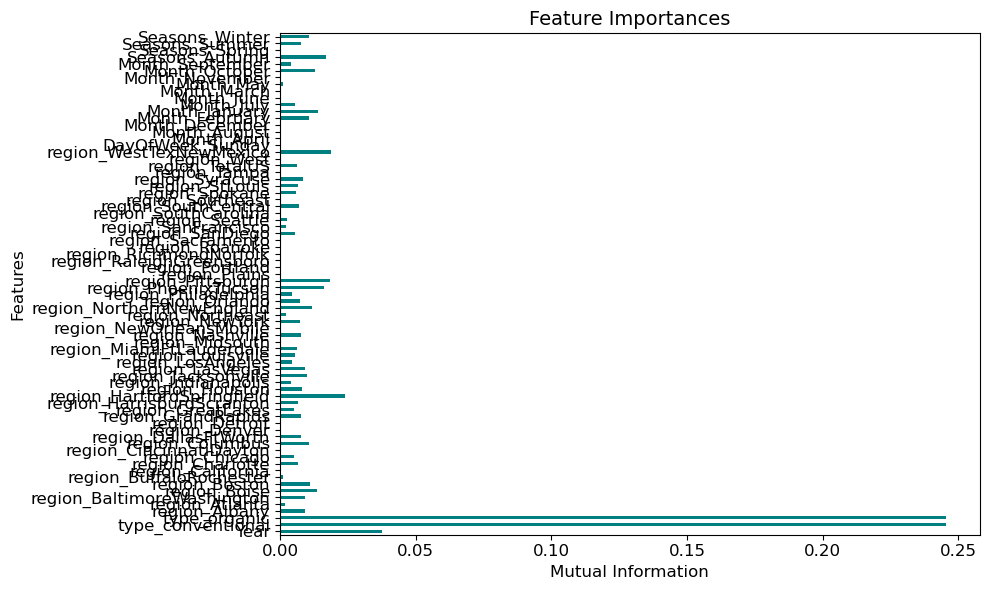

In [295]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_regression

# Assuming 'df1' is your DataFrame
Y = df1['AveragePrice']

# Convert categorical variables to one-hot encoded representation
X = pd.get_dummies(df1[['type', 'region', 'DayOfWeek', 'Month', 'Year', 'Seasons']])

importances = mutual_info_regression(X, Y)
feat_importances = pd.Series(importances, index=X.columns)

# Increase the figure size
plt.figure(figsize=(10, 6))

# Plot the feature importances with larger font size
feat_importances.plot(kind='barh', color='teal', fontsize=12)

# Set labels and title
plt.xlabel('Mutual Information', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.title('Feature Importances', fontsize=14)

# Increase the spacing between the bars
plt.subplots_adjust(left=0.3)

# Display the plot
plt.tight_layout()
plt.show()


In [364]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

X_cat = X.astype(int)

chi2_features = SelectKBest(chi2, k = 3)
X_kbest_features = chi2_features.fit_transform(X_cat,Y)

print('Original feature number:', X_cat.shape[1])
print('Reduced feature number:' , X_kbest_features.shape[1])

ValueError: Unknown label type: (array([1.33, 1.35, 0.93, ..., 1.87, 1.93, 1.62]),)

/var/folders/l7/_m002gfn2dlgknd23ht94kt00000gq/T/ipykernel_4641/3993813906.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df1.corr()


<Axes: >

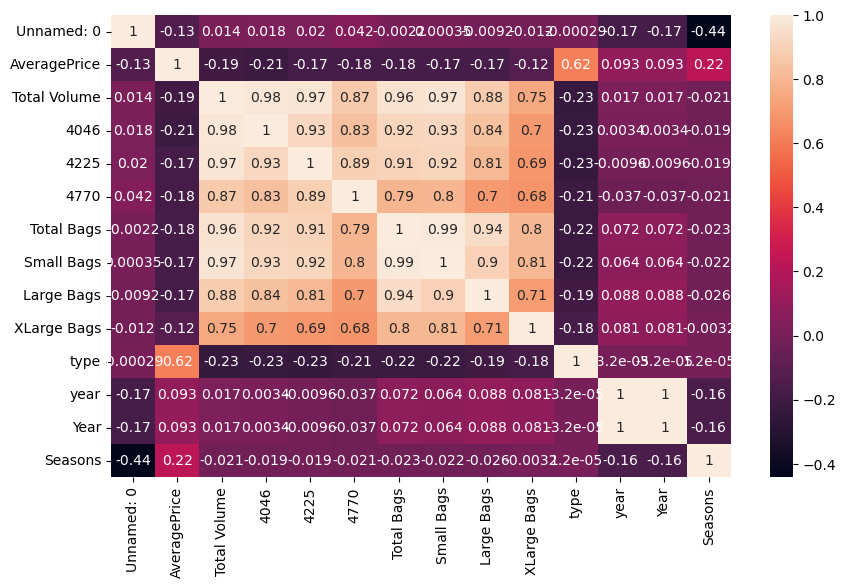

In [319]:
#FILTER METHODS
#CORRELATION COEFFICIENT

cor = df1.corr()

plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)

In [320]:

#VARIANCE THRESHOLD
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

selected_columns = ['AveragePrice','Total Volume','4046','4225','4770','Total Bags','Small Bags','Large Bags', 'XLarge Bags','Year']  

X = df1[selected_columns]  # Select the specific columns
v_threshold = VarianceThreshold(threshold=0)
v_threshold.fit(X)
selected_features = v_threshold.get_support()

print(selected_features)


[ True  True  True  True  True  True  True  True  True  True]


<BarContainer object of 10 artists>

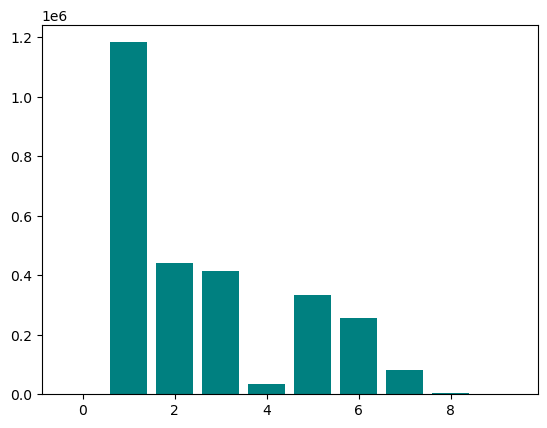

In [321]:

mean_abs_diff = np.sum(np.abs(X -np.mean(X,axis = 0)), axis =0)/X.shape[0]

plt.bar(np.arange(X.shape[1]),mean_abs_diff, color = 'teal')

In [322]:
df1.nunique()

Unnamed: 0         53
Date              169
AveragePrice      259
Total Volume    18237
4046            17702
4225            18103
4770            12071
Total Bags      18097
Small Bags      17321
Large Bags      15082
XLarge Bags      5588
type                2
year                4
region             54
DayOfWeek           1
Month              12
Year                4
Seasons             4
dtype: int64

In [323]:
df = df1.drop('year', axis=1)

In [324]:
df = df1.drop('Unnamed: 0', axis=1)

In [325]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df1['type']= label_encoder.fit_transform(df1['type'])
  
df1['type'].unique()

array([0, 1])

In [326]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['DayOfWeek']= label_encoder.fit_transform(df['DayOfWeek'])
  
df['DayOfWeek'].unique()

array([0])

In [378]:
features = ['Total Volume' , '4046'	, '4225' , '4770' , 'Total Bags' , 'Small Bags' , 'Large Bags' , 'XLarge Bags' , 'type', 'Seasons']
target = 'AveragePrice'
X = df1[features]
Y = df1[target]


import pandas
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()



scaledX = scale.fit_transform(X)

print(scaledX)


[[-0.22771641 -0.23081597 -0.1999022  ... -0.17557961 -0.99983562
  -1.25965745]
 [-0.23042664 -0.23110251 -0.20805446 ... -0.17557961 -0.99983562
  -1.25965745]
 [-0.21208462 -0.23100731 -0.1544779  ... -0.17557961 -0.99983562
  -1.25965745]
 ...
 [-0.24233073 -0.2306933  -0.24309014 ... -0.17557961  1.00016441
  -1.25965745]
 [-0.24162464 -0.2304279  -0.24265143 ... -0.17557961  1.00016441
  -1.25965745]
 [-0.24125273 -0.22934712 -0.24317042 ... -0.17557961  1.00016441
  -1.25965745]]


In [394]:
X_train, X_test, y_train, y_test = train_test_split(scaledX, Y, test_size=0.2, random_state=42)


In [387]:
from sklearn.tree import DecisionTreeRegressor 

regressor = DecisionTreeRegressor(random_state=0)
 
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [395]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor

# create regressor object
regressor = RandomForestRegressor(n_estimators=100,
								random_state=0)

# fit the regressor with x and y data
regressor.fit(X_train, y_train)



RandomForestRegressor(random_state=0)

In [389]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [396]:
y_pred = regressor.predict(X_test)


In [397]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


Mean Squared Error: 0.031537136158904105
R-squared: 0.8037137232149086


In [392]:
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Calculate MAE
mae = mean_absolute_error(y_test, y_pred)

print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Root Mean Squared Error (RMSE): 0.17758698195223688
Mean Absolute Error (MAE): 0.12492427397260275


In [393]:
df1['AveragePrice'].mean()

1.405978409775878

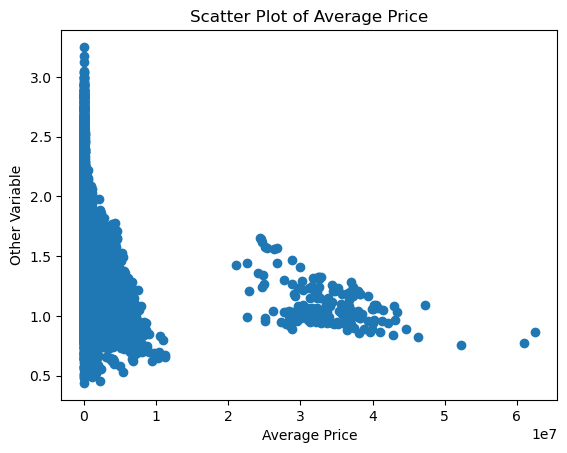

In [216]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a dataset stored in a DataFrame called 'df'
# Make sure 'averageprice' and the other variable are present in the DataFrame

# Create a scatter plot
plt.scatter(df1['Total Volume'], df1['AveragePrice'])

# Add labels and title
plt.xlabel('Average Price')
plt.ylabel('Other Variable')
plt.title('Scatter Plot of Average Price')

# Display the plot
plt.show()


In [219]:
import pandas as pd
from scipy import stats

# Assuming you have a DataFrame called 'df' with the 'averageprice' column

# Calculate z-scores
df1['AveragePrice_zscore'] = stats.zscore(df1['AveragePrice'])

# Print the z-scores
print(df1['AveragePrice_zscore'])


0       -0.188689
1       -0.139020
2       -1.182069
3       -0.809551
4       -0.312861
           ...   
18244    0.556347
18245    0.755023
18246    1.152375
18247    1.301382
18248    0.531512
Name: AveragePrice_zscore, Length: 18249, dtype: float64


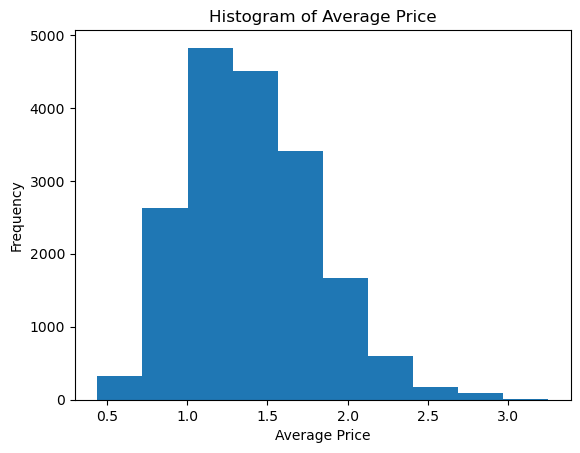

In [220]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame called 'df' with the 'averageprice' column

# Create a histogram
plt.hist(df1['AveragePrice'], bins=10)

# Add labels and title
plt.xlabel('Average Price')
plt.ylabel('Frequency')
plt.title('Histogram of Average Price')

# Display the plot
plt.show()


In [222]:
import pandas as pd

# Assuming you have a DataFrame called 'df' with the 'averageprice' column

# Calculate the interquartile range
Q1 = df1['AveragePrice'].quantile(0.25)
Q3 = df1['AveragePrice'].quantile(0.75)
IQR = Q3 - Q1

# Print the interquartile range
print("Interquartile Range (IQR):", IQR)


Interquartile Range (IQR): 0.5599999999999998
